In [1]:
import sys
import os
import numpy as np
from experiments.hawkes_coeffs import retrieve_coeffs, coeffs_from_mus_alpha
sys.path = [os.path.abspath('../')] + sys.path

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/m.bompaire/miniconda3/envs/tick/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dim = 30
directory_path = '/home/m.bompaire/experiments/hawkes_data/'
n_decays = 3
run_time = 20000

In [3]:
from experiments.create_assets.coeffs import plot_coeffs_3_decays
import pickle

weights_file = 'penalization_weights.npz'

if os.path.exists(weights_file):
    weights = np.load(open(weights_file, 'rb'))
else:
    model_file_name = os.path.join(directory_path, f'train_hawkes/dim_{dim}/u={n_decays}/T_{run_time}/precomputed/precomputed_000.pkl')
    precomputed_model = pickle.load(open(model_file_name, 'rb'))

    weights = precomputed_model.compute_penalization_constant(strength=0.1)
    np.save(open(weights_file, 'wb'), weights)

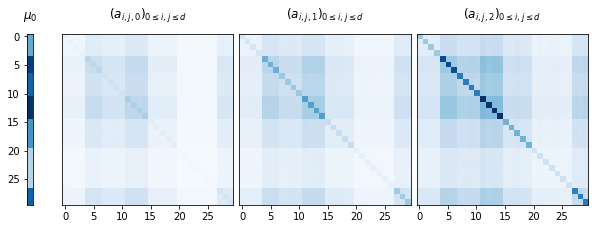

In [4]:
plot_coeffs_3_decays(weights)
None

coeffs file existed already and was the same


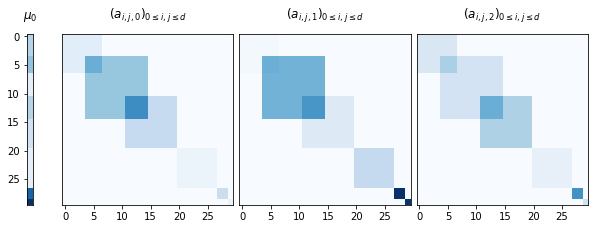

In [6]:
decays, mu, alpha = retrieve_coeffs(30, 3, directory_path)
plot_coeffs_3_decays(coeffs_from_mus_alpha(mu, alpha))
None